In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

In [5]:
# Load the Cross Sell Prediction - train & test data

CS_Train = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Docs\CSP_Files\cs_train.csv", header=0)
CS_Test = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Docs\CSP_Files\cs_test.csv", header=0)
CS_Train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
# Find missing values in the train dataset if any

CS_Train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
# Find missing values in the test dataset if any

CS_Test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [8]:
# display the Dataset description

CS_Train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


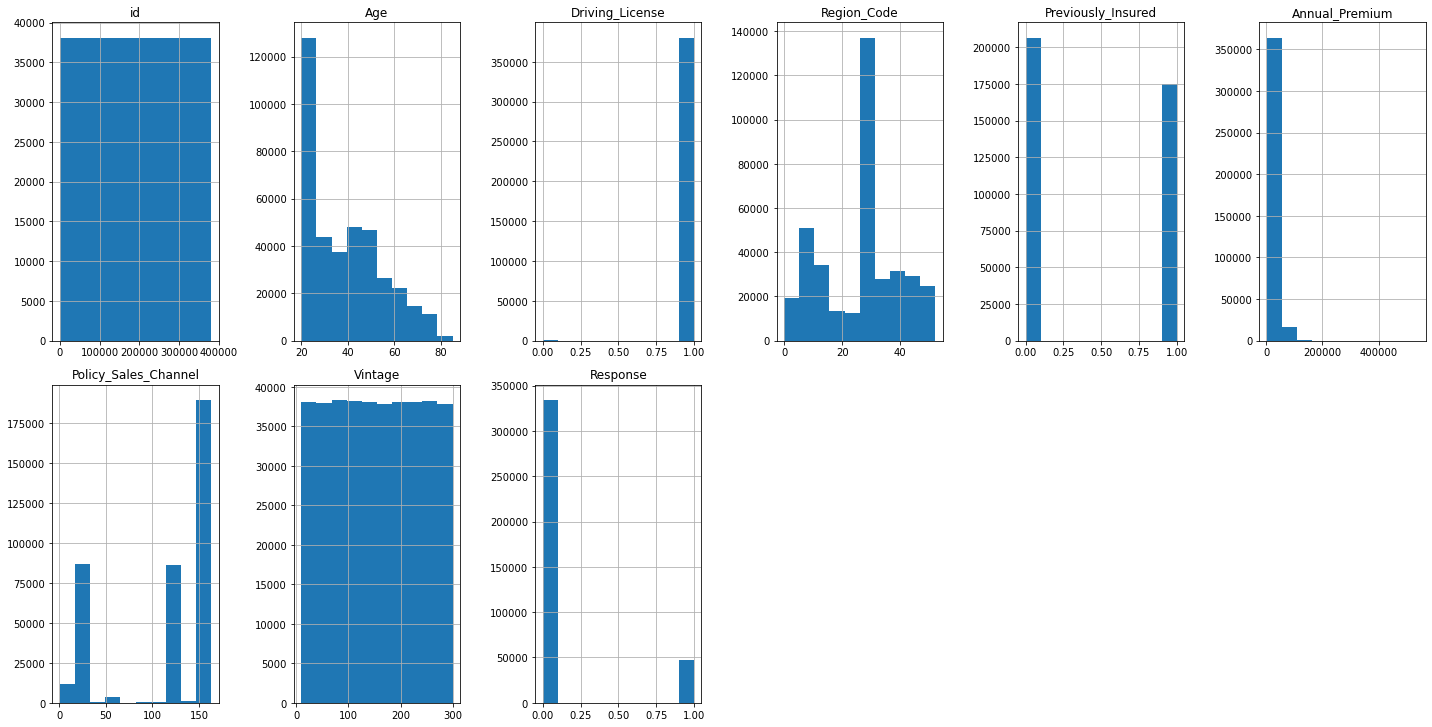

In [9]:
# Plot a histogram for each numerical variable and analyze the distribution

CS_Train.hist(figsize=(20,15),layout=(3,6))
plt.tight_layout()
plt.show()

In [10]:
# Copy files to back files

CS_Train_BK = CS_Train.copy()
CS_Test_BK = CS_Test.copy()

In [11]:
# Drop the Driving_License bco it is unbalanced ratio between the labels

CS_Train.drop('Driving_License',axis=1,inplace=True)
CS_Test.drop('Driving_License',axis=1,inplace=True)

# Numerical and Categorical variables analysis

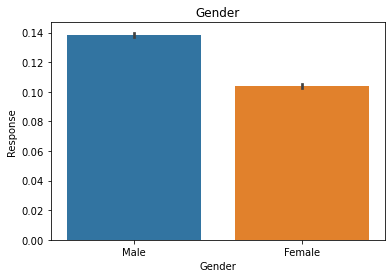

In [12]:
# Gender vs Response

sns.barplot(x='Gender',y='Response',data=CS_Train)
plt.title('Gender')
plt.show()

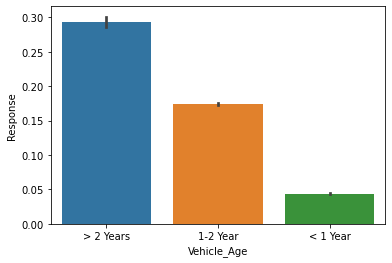

In [13]:
# Vehicle_Age vs Response

sns.barplot(x='Vehicle_Age',y='Response',data=CS_Train)
plt.show()

In [14]:
# Data Cleaning - Gender by using map() function

gender_map={'Male':0,'Female':1}
CS_Train['Gender']=CS_Train['Gender'].map(gender_map)
CS_Test['Gender']=CS_Test['Gender'].map(gender_map)

In [15]:
# Data Cleaning - Vehicle_Age by using map() function

vehicle_age_map={'1-2 Year':0,'< 1 Year':1,'> 2 Years':2}
CS_Train['Vehicle_Age']=CS_Train['Vehicle_Age'].map(vehicle_age_map)
CS_Test['Vehicle_Age']=CS_Test['Vehicle_Age'].map(vehicle_age_map)

In [16]:
# Data Cleaning - Vehicle_Damage by using map() function

Vehicle_Damage_map={'Yes':0,'No':1}
CS_Train['Vehicle_Damage']=CS_Train['Vehicle_Damage'].map(Vehicle_Damage_map)
CS_Test['Vehicle_Damage']=CS_Test['Vehicle_Damage'].map(Vehicle_Damage_map)

In [17]:
CS_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


In [18]:
CS_Train.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,28.0,0,2,0,40454.0,26.0,217,1
1,2,0,76,3.0,0,0,1,33536.0,26.0,183,0
2,3,0,47,28.0,0,2,0,38294.0,26.0,27,1
3,4,0,21,11.0,1,1,1,28619.0,152.0,203,0
4,5,1,29,41.0,1,1,1,27496.0,152.0,39,0


In [19]:
CS_Test.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,0,25,11.0,1,1,1,35786.0,152.0,53
1,381111,0,40,28.0,0,0,0,33762.0,7.0,111
2,381112,0,47,28.0,0,0,0,40050.0,124.0,199
3,381113,0,24,27.0,1,1,0,37356.0,152.0,187
4,381114,0,27,28.0,1,1,1,59097.0,152.0,297


In [20]:
# Drop the id bcoz it is  unbalanced ratio between the labels

CS_Train.drop('id',axis=1,inplace=True)
CS_Test.drop('id',axis=1,inplace=True)

In [21]:
# Identify the independent and Target variables

IndepVar = []
for col in CS_Train.columns:
    if col != 'Response':
        IndepVar.append(col)

TargetVar = 'Response'

x = CS_Train[IndepVar]
y = CS_Train[TargetVar]

In [22]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Logistic Regression

Confusion matrix : 
 [[     0  14138]
 [     0 100195]]
Outcome values : 
 0 14138 0 100195
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00     14138
           0       0.88      1.00      0.93    100195

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333

Accuracy : 87.6 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


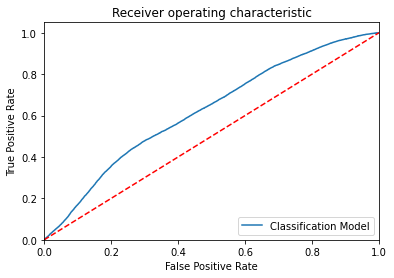

-----------------------------------------------------------------------------------------------------


In [23]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

ModelLR = LogisticRegression()

# Train the model with training dataset 

ModelLR.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelLR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

Confusion matrix : 
 [[ 4212  9926]
 [10363 89832]]
Outcome values : 
 4212 9926 10363 89832
Classification report : 
               precision    recall  f1-score   support

           1       0.29      0.30      0.29     14138
           0       0.90      0.90      0.90    100195

    accuracy                           0.82    114333
   macro avg       0.59      0.60      0.60    114333
weighted avg       0.82      0.82      0.82    114333

Accuracy : 82.3 %
Precision : 28.9 %
Recall : 29.8 %
F1 Score : 0.293
Specificity or True Negative Rate : 89.7 %
Balanced Accuracy : 59.8 %
MCC : 0.192
roc_auc_score: 0.597


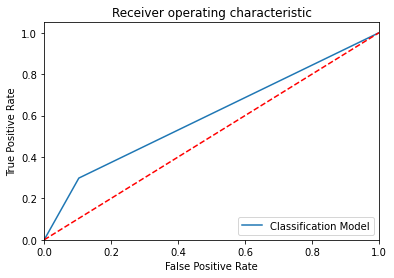

-----------------------------------------------------------------------------------------------------


In [25]:
# To build the 'Decision Tree' model with random sampling

from sklearn.tree import DecisionTreeClassifier 

ModelDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                 max_depth=None, max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                 random_state=None, splitter='best')

# Train the model with training dataset 

ModelDT.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelDT.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelDT.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

Confusion matrix : 
 [[ 1678 12460]
 [ 2845 97350]]
Outcome values : 
 1678 12460 2845 97350
Classification report : 
               precision    recall  f1-score   support

           1       0.37      0.12      0.18     14138
           0       0.89      0.97      0.93    100195

    accuracy                           0.87    114333
   macro avg       0.63      0.55      0.55    114333
weighted avg       0.82      0.87      0.83    114333

Accuracy : 86.6 %
Precision : 37.1 %
Recall : 11.9 %
F1 Score : 0.18
Specificity or True Negative Rate : 97.2 %
Balanced Accuracy : 54.6 %
MCC : 0.152
roc_auc_score: 0.545


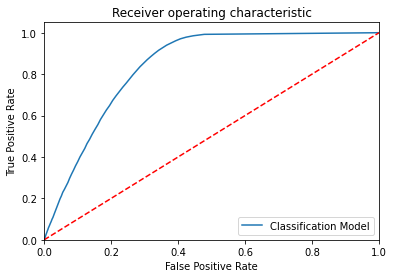

-----------------------------------------------------------------------------------------------------


In [26]:
# To build the 'Random forest' model with random sampling

from sklearn.ensemble import RandomForestClassifier

ModelRF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                 n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                 ccp_alpha=0.0, max_samples=None)

# Train the model with training dataset 

ModelRF.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelRF.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelRF.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [27]:
CS_Train.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,28.0,0,2,0,40454.0,26.0,217,1
1,0,76,3.0,0,0,1,33536.0,26.0,183,0
2,0,47,28.0,0,2,0,38294.0,26.0,27,1
3,0,21,11.0,1,1,1,28619.0,152.0,203,0
4,1,29,41.0,1,1,1,27496.0,152.0,39,0


In [ ]:
## Fit the tree
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(x_train.Age.to_frame(),y_train)

In [ ]:
## Calculate the probability
x_train['Age_tree']=dtree.predict_proba(x_train.Age.to_frame())[:,1]

In [ ]:
age_limit=pd.DataFrame({'Min_Age':x_train.groupby('Age_tree')['Age'].min(),
                        'Max_Age':x_train.groupby('Age_tree')['Age'].max()})

In [ ]:
CS_Train.loc[(CS_Train['Age']>=20) & (CS_Train['Age']<27),'Age_label']='Teenagers' 
CS_Train.loc[(CS_Train['Age']>=27) & (CS_Train['Age']<29),'Age_label']='Young' 
CS_Train.loc[(CS_Train['Age']>=29) & (CS_Train['Age']<58),'Age_label']='Middle Age' 
CS_Train.loc[(CS_Train['Age']>=58) & (CS_Train['Age']<=85),'Age_label']='Old Age'

In [ ]:
sns.barplot(CS_Train['Age_label'],CS_Train['Annual_Premium'])
plt.title('Annual_Premium according to Age')
plt.show()

In [ ]:
# Predict the model with test data set

y_pred1 = ModelRF.predict(CS_Test)

In [ ]:
# Merge two Dataframes on index of both the dataframes

Results = pd.DataFrame({'Response_P':y_pred1})
ResultsFinal = CS_Test_BK.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(10)